<a href="https://colab.research.google.com/github/Persistent-zen/employee-salary-predictoremployee-salary-predictor-draft-1/blob/main/Step_1_Data_Acquisition_Generating_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

# --- Configuration for Synthetic Data Generation ---
NUM_EMPLOYEES = 1000 # Number of synthetic employees to generate
SALARY_BASE = 50000 # Base salary for calculations
SALARY_RANGE = 150000 # Max deviation from base for salary
SKILL_COUNT_MAX = 10 # Max number of skills an employee can have

# Define possible categories for various features
EDUCATION_LEVELS = ['High School', 'Associate', 'Bachelor\'s', 'Master\'s', 'PhD']
JOB_TITLES = ['Software Engineer', 'Data Scientist', 'Product Manager', 'UX Designer', 'Marketing Specialist', 'HR Generalist', 'Sales Executive']
INDUSTRIES = ['Technology', 'Finance', 'Healthcare', 'Manufacturing', 'Retail', 'Education']
LOCATIONS = ['New York', 'San Francisco', 'Austin', 'Chicago', 'Remote', 'London', 'Berlin']
SKILLS_LIST = ['Python', 'SQL', 'AWS', 'Azure', 'GCP', 'Machine Learning', 'Deep Learning', 'Data Analysis', 'Project Management', 'Communication', 'Leadership', 'Salesforce', 'Tableau', 'PowerBI', 'Excel', 'JavaScript', 'React', 'Node.js', 'Java', 'C++', 'Marketing Strategy', 'HR Policies']
COMPANY_SIZES = ['Small (1-50)', 'Medium (51-500)', 'Large (501-5000)', 'Enterprise (>5000)']

# --- Generate Synthetic Data ---
data = {
    'Employee_ID': range(1, NUM_EMPLOYEES + 1),
    'Age': np.random.randint(22, 60, NUM_EMPLOYEES),
    'Gender': np.random.choice(['Male', 'Female', 'Non-binary'], NUM_EMPLOYEES, p=[0.48, 0.48, 0.04]),
    'Years_Experience': np.random.uniform(0, 30, NUM_EMPLOYEES).round(1),
    'Education_Level': np.random.choice(EDUCATION_LEVELS, NUM_EMPLOYEES, p=[0.1, 0.15, 0.4, 0.25, 0.1]),
    'Job_Title': np.random.choice(JOB_TITLES, NUM_EMPLOYEES),
    'Industry': np.random.choice(INDUSTRIES, NUM_EMPLOYEES),
    'Location': np.random.choice(LOCATIONS, NUM_EMPLOYEES, p=[0.15, 0.15, 0.1, 0.1, 0.2, 0.15, 0.15]),
    'Company_Size': np.random.choice(COMPANY_SIZES, NUM_EMPLOYEES, p=[0.2, 0.3, 0.3, 0.2]),
    'Performance_Rating': np.random.randint(1, 6, NUM_EMPLOYEES), # 1-5 scale
    'Promotions_Last_3_Years': np.random.randint(0, 4, NUM_EMPLOYEES),
}

df = pd.DataFrame(data)

# Add 'Skills' as a list of random skills for each employee
df['Skills'] = [random.sample(SKILLS_LIST, random.randint(1, SKILL_COUNT_MAX)) for _ in range(NUM_EMPLOYEES)]

# --- Calculate Salary based on a simplified formula (for demonstration) ---
# This formula simulates how different factors might influence salary.
# In a real scenario, the model would learn these relationships.
def calculate_salary(row):
    salary = SALARY_BASE

    # Add based on Years of Experience
    salary += row['Years_Experience'] * (SALARY_RANGE / 30) # Scale by max experience

    # Add based on Education Level
    education_bonus = {
        'High School': 0,
        'Associate': 5000,
        'Bachelor\'s': 15000,
        'Master\'s': 30000,
        'PhD': 50000
    }
    salary += education_bonus.get(row['Education_Level'], 0)

    # Add based on Job Title (simplified for demo)
    job_title_bonus = {
        'Software Engineer': 20000, 'Data Scientist': 25000, 'Product Manager': 18000,
        'UX Designer': 15000, 'Marketing Specialist': 10000, 'HR Generalist': 8000,
        'Sales Executive': 12000
    }
    salary += job_title_bonus.get(row['Job_Title'], 0)

    # Add based on Location (simplified for demo)
    location_bonus = {
        'New York': 30000, 'San Francisco': 35000, 'Austin': 15000,
        'Chicago': 10000, 'Remote': 5000, 'London': 25000, 'Berlin': 20000
    }
    salary += location_bonus.get(row['Location'], 0)

    # Add based on Performance Rating
    salary += row['Performance_Rating'] * 2000

    # Add based on Promotions
    salary += row['Promotions_Last_3_Years'] * 5000

    # Add a random noise to make it more realistic
    salary += np.random.normal(0, 10000) # Add some random fluctuation

    # Ensure salary is positive and within a reasonable range
    return max(10000, min(salary, SALARY_BASE + SALARY_RANGE + 100000)) # Cap at a high value

df['Salary'] = df.apply(calculate_salary, axis=1).round(2)

print("Synthetic Data Generated:")
print(df.head())
print("\nData Info:")
df.info()
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())

Synthetic Data Generated:
   Employee_ID  Age  Gender  Years_Experience Education_Level       Job_Title  \
0            1   50  Female              10.4      Bachelor's  Data Scientist   
1            2   44    Male               5.3       Associate     UX Designer   
2            3   31    Male              19.7     High School   HR Generalist   
3            4   45  Female               0.0      Bachelor's     UX Designer   
4            5   37    Male              12.5        Master's     UX Designer   

        Industry Location        Company_Size  Performance_Rating  \
0  Manufacturing   London        Small (1-50)                   1   
1     Technology  Chicago  Enterprise (>5000)                   4   
2     Technology   Berlin        Small (1-50)                   1   
3         Retail   London    Large (501-5000)                   2   
4     Technology   Remote  Enterprise (>5000)                   2   

   Promotions_Last_3_Years                                             S

--- Starting Exploratory Data Analysis (EDA) ---

1. Data Information (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee_ID              1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Years_Experience         1000 non-null   float64
 4   Education_Level          1000 non-null   object 
 5   Job_Title                1000 non-null   object 
 6   Industry                 1000 non-null   object 
 7   Location                 1000 non-null   object 
 8   Company_Size             1000 non-null   object 
 9   Performance_Rating       1000 non-null   int64  
 10  Promotions_Last_3_Years  1000 non-null   int64  
 11  Skills                   1000 non-null   object 
 12  Salary                   1000 non-null   float64
d

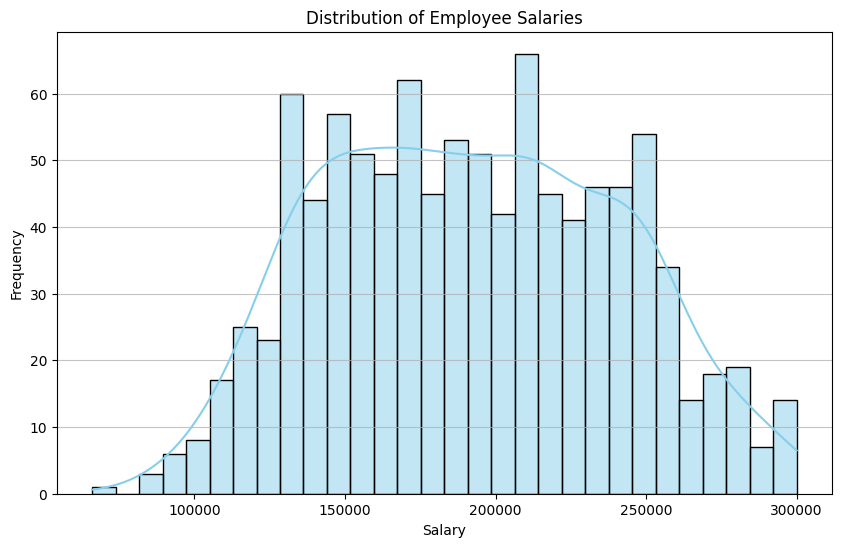


5. Distribution of Numerical Features:


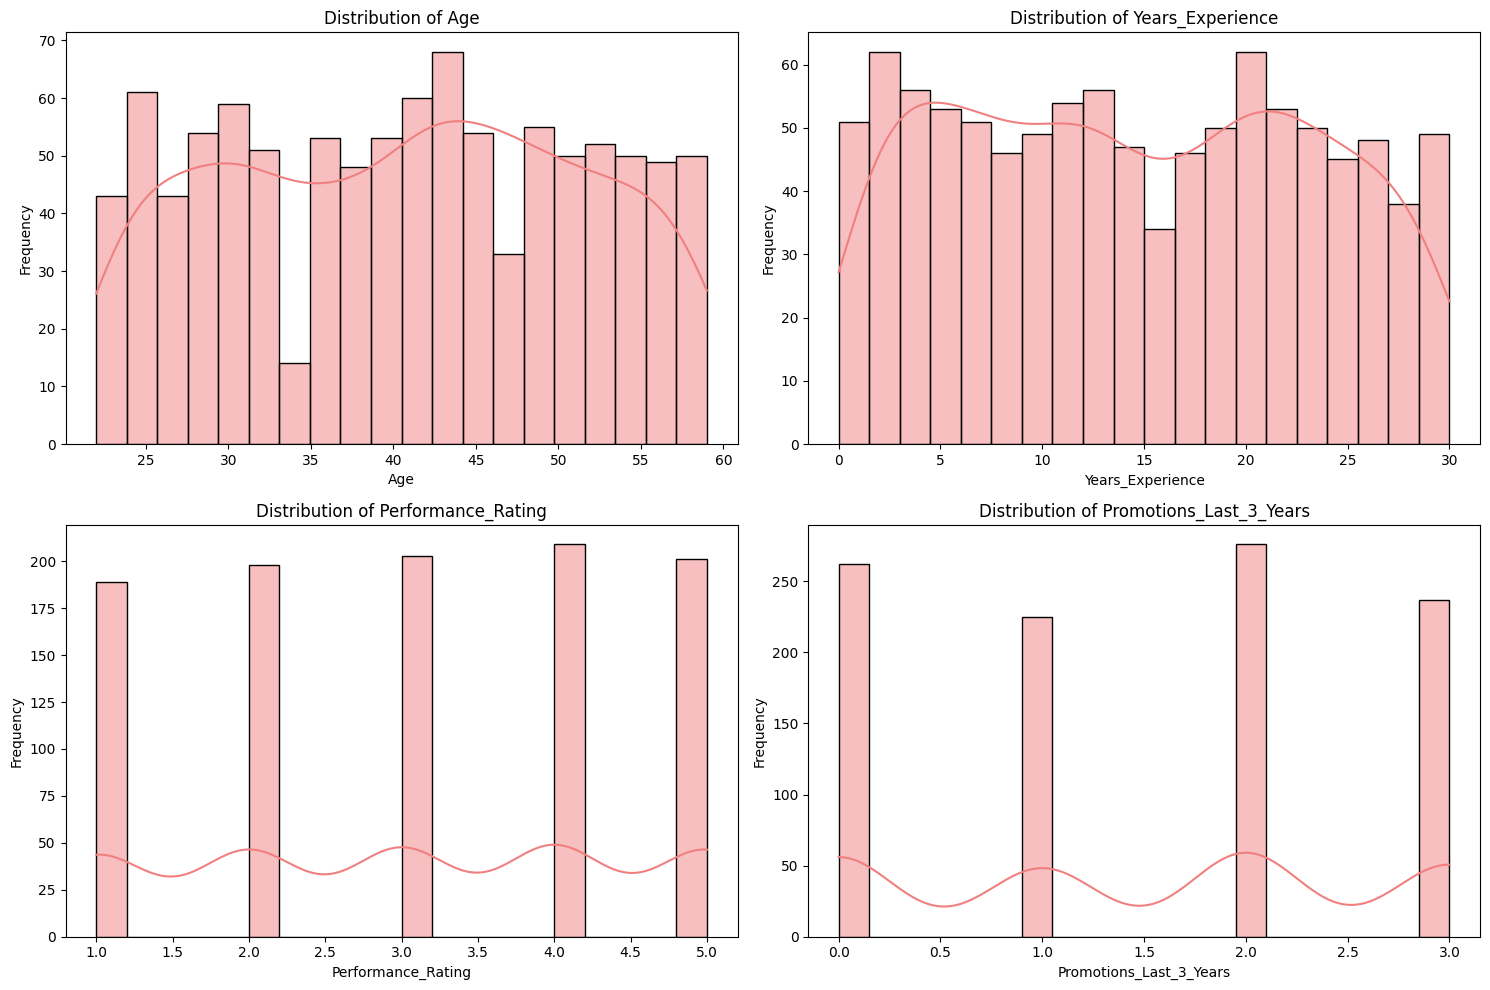


6. Relationship between Numerical Features and Salary:


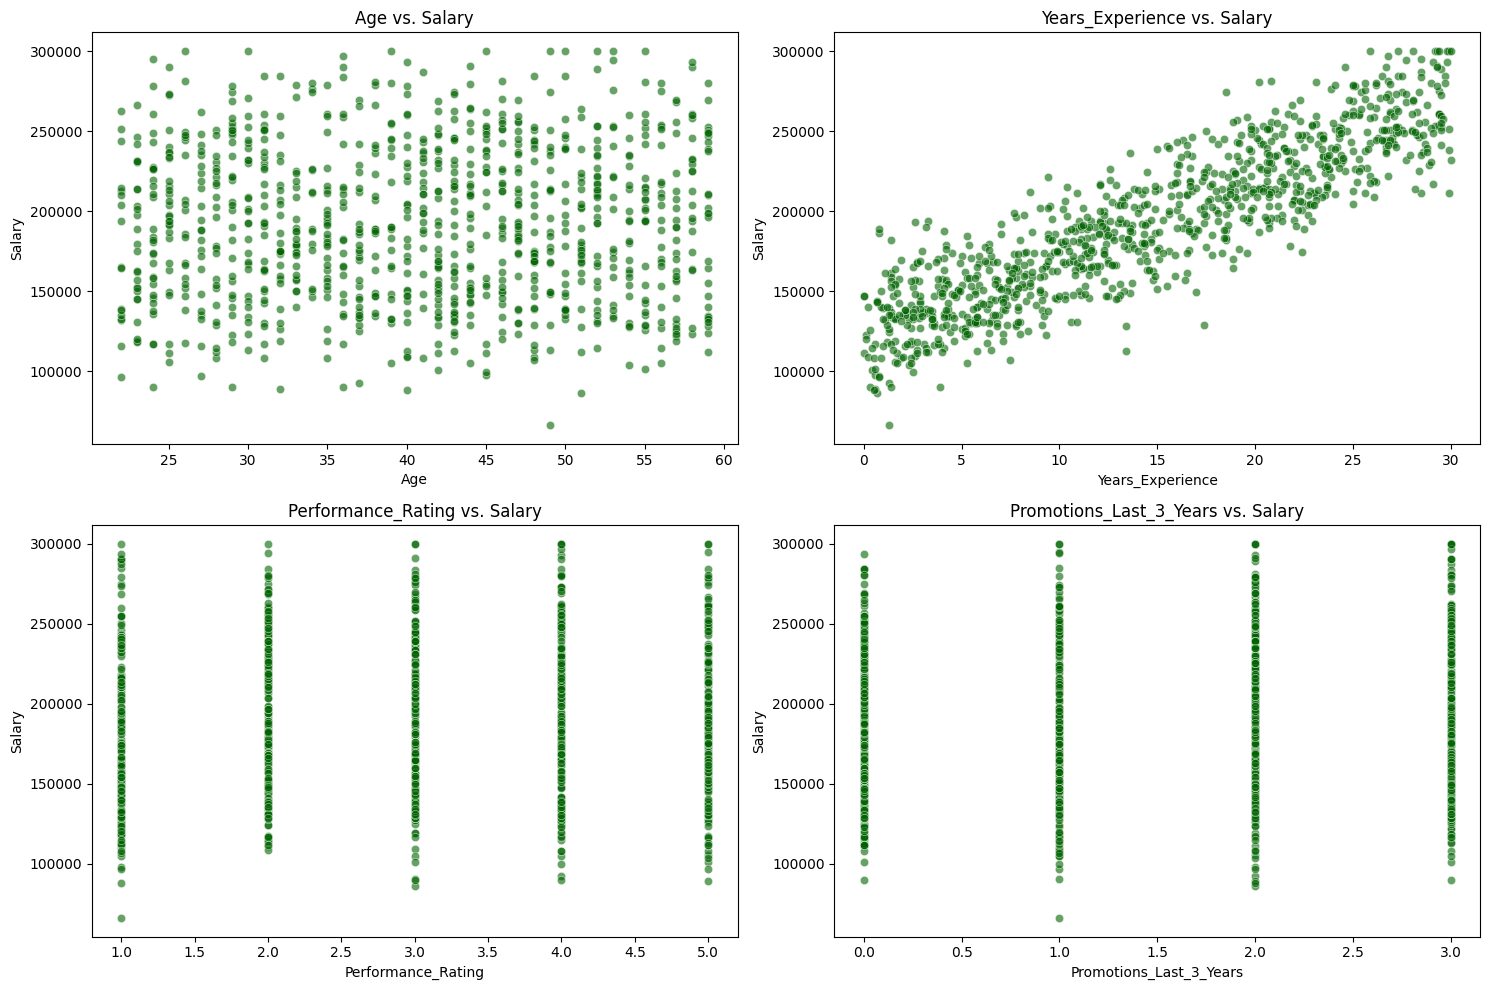


7. Relationship between Categorical Features and Salary:


/tmp/ipython-input-2-341490938.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['Salary'], palette='viridis')
/tmp/ipython-input-2-341490938.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['Salary'], palette='viridis')
/tmp/ipython-input-2-341490938.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['Salary'], palette='viridis')
/tmp/ipython-input-2-341490938.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

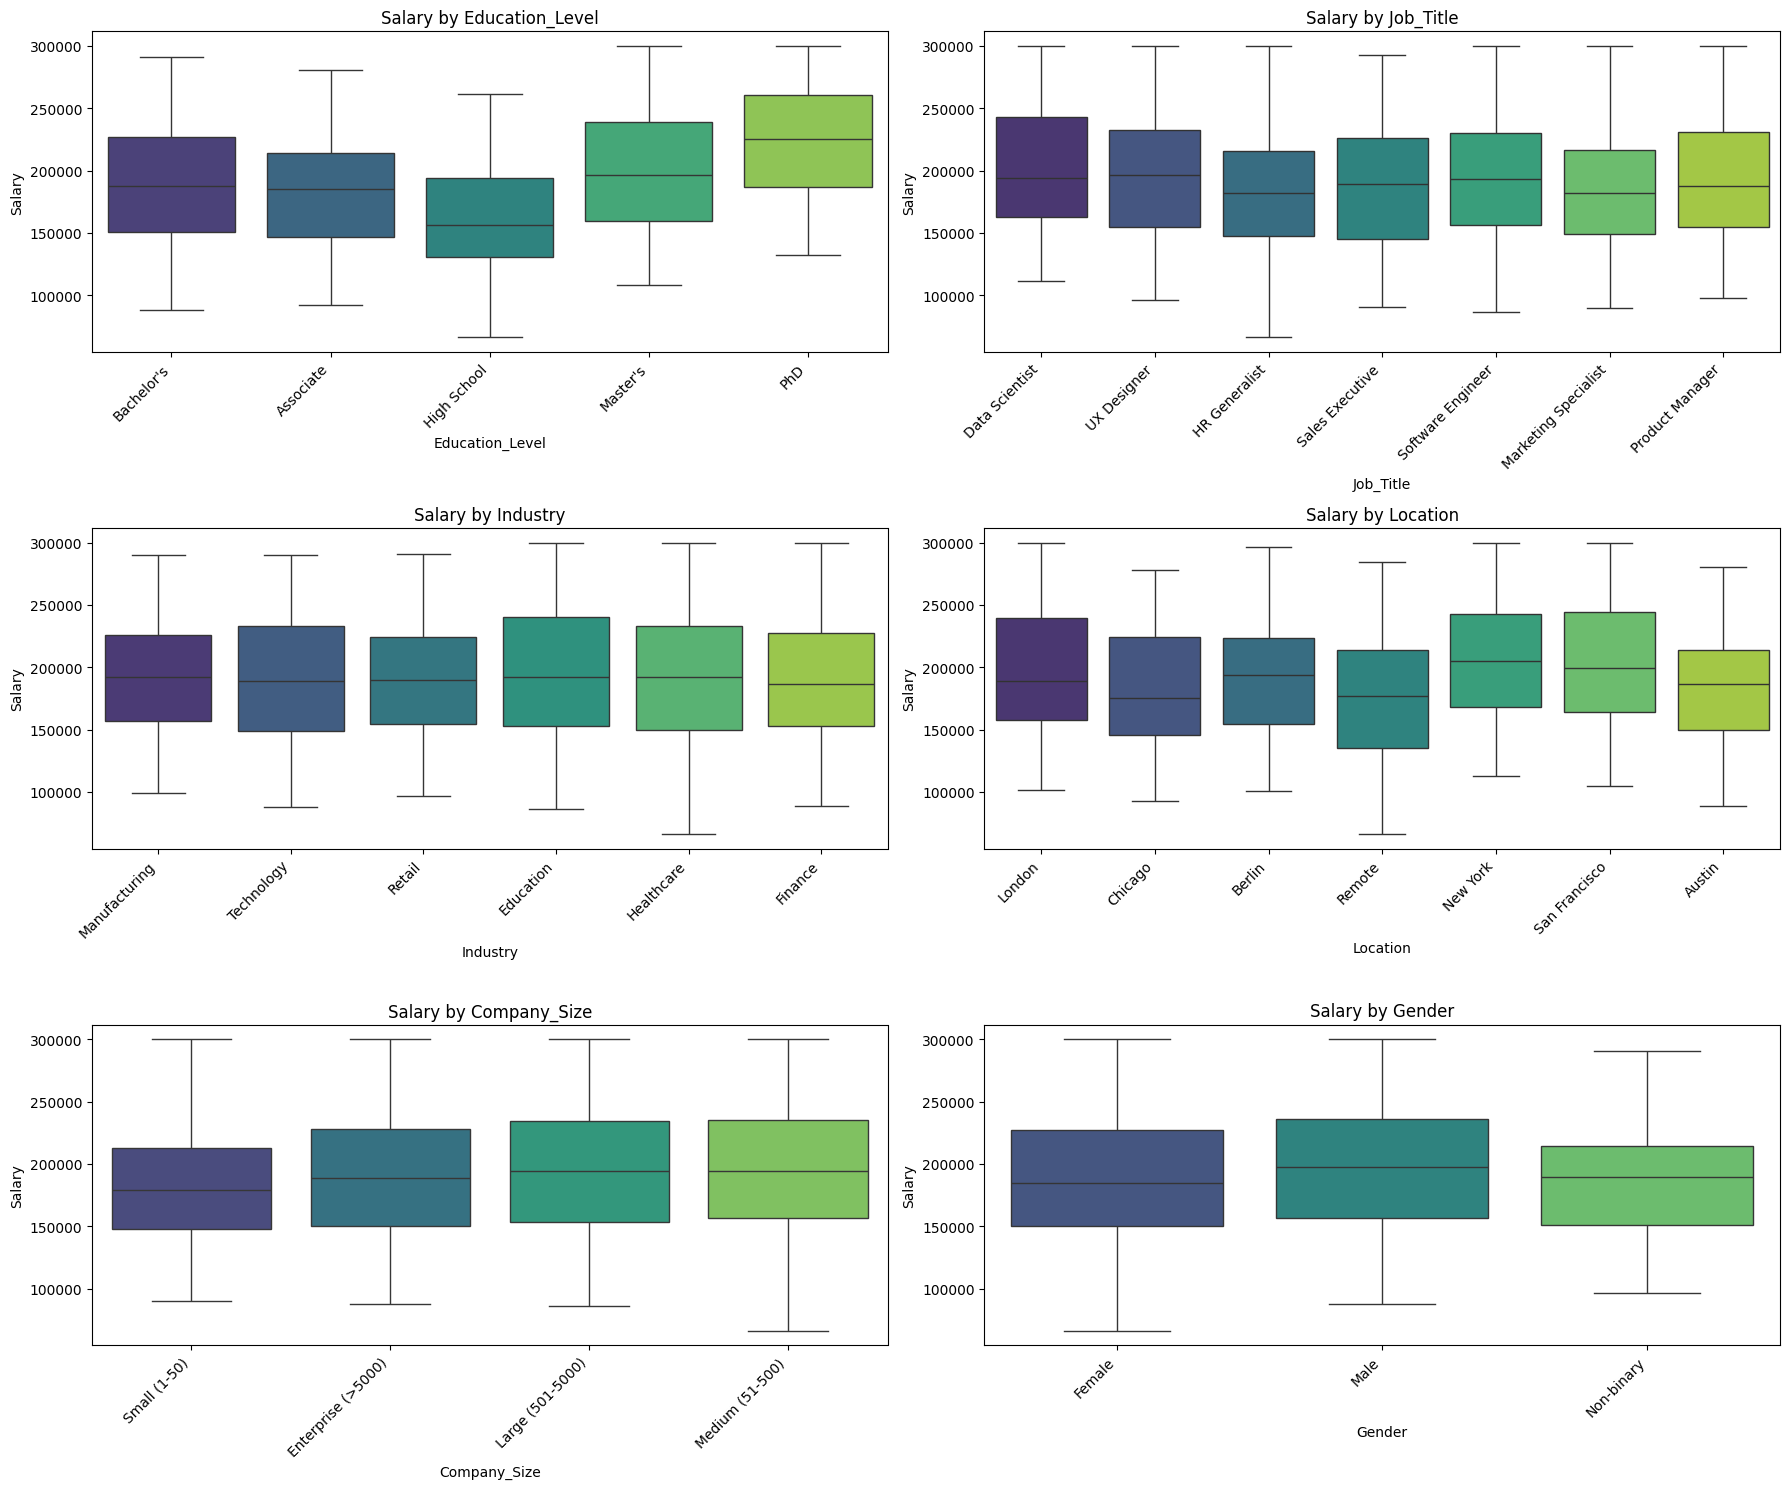


8. Correlation Matrix:


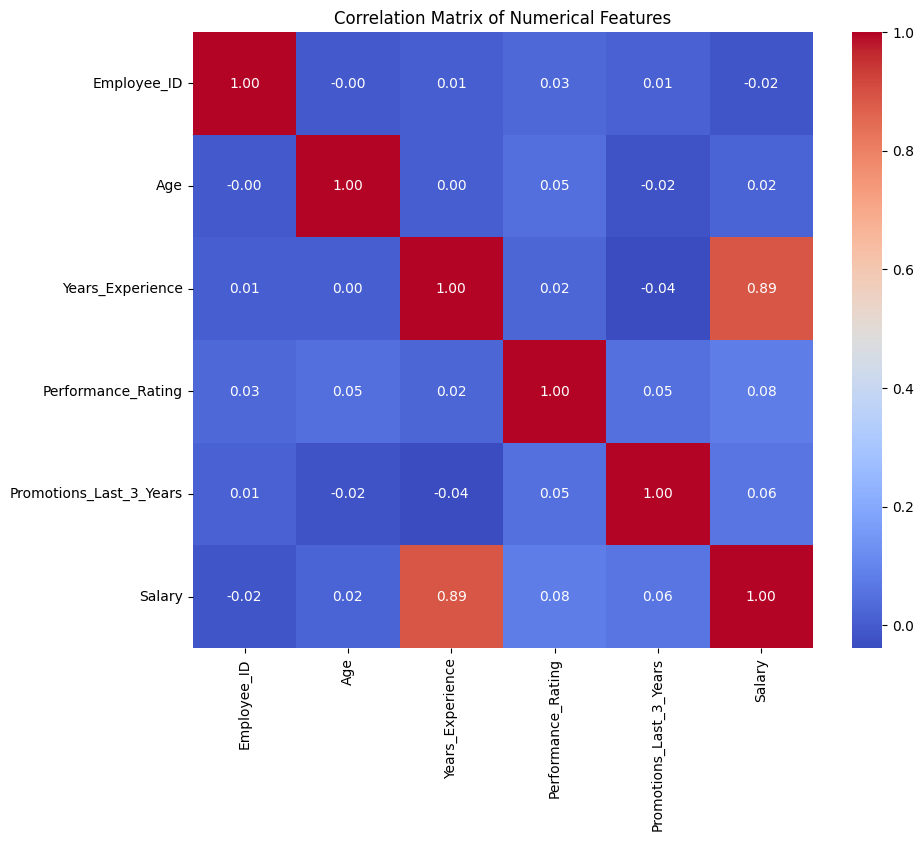


9. Top 10 Most Common Skills:
[('JavaScript', 267), ('Leadership', 263), ('Communication', 259), ('Excel', 259), ('Python', 258), ('Data Analysis', 257), ('Node.js', 256), ('Deep Learning', 254), ('Azure', 252), ('PowerBI', 252)]

--- EDA Complete ---
Key observations from EDA:
- Salary distribution appears somewhat normal, but might be slightly skewed.
- Years of Experience and Education Level show clear positive relationships with Salary.
- Job Title, Location, and Company Size also significantly influence salary ranges.
- No missing values in this synthetic dataset (as expected).
- Performance Rating and Promotions also contribute to salary, though perhaps less strongly than experience/education.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' DataFrame is already generated from the previous step
# If running this code independently, you'd load your data here:
# df = pd.read_csv('your_salary_data.csv')

print("--- Starting Exploratory Data Analysis (EDA) ---")

# 1. Display Basic Information and Summary Statistics
print("\n1. Data Information (df.info()):")
df.info()

print("\n2. Descriptive Statistics for Numerical Features (df.describe()):")
print(df.describe())

# 3. Check for Missing Values
print("\n3. Missing Values Count (df.isnull().sum()):")
print(df.isnull().sum())
# Visualize missing values (optional, but good for larger datasets)
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Values Heatmap')
# plt.show()

# 4. Distribution of the Target Variable (Salary)
print("\n4. Distribution of Salary:")
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 5. Distribution of Key Numerical Features
print("\n5. Distribution of Numerical Features:")
numerical_features = ['Age', 'Years_Experience', 'Performance_Rating', 'Promotions_Last_3_Years']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=20, color='lightcoral')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6. Relationship between Numerical Features and Salary (Scatter Plots)
print("\n6. Relationship between Numerical Features and Salary:")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[feature], y=df['Salary'], alpha=0.6, color='darkgreen')
    plt.title(f'{feature} vs. Salary')
    plt.xlabel(feature)
    plt.ylabel('Salary')
plt.tight_layout()
plt.show()

# 7. Relationship between Categorical Features and Salary (Box Plots)
print("\n7. Relationship between Categorical Features and Salary:")
categorical_features = ['Education_Level', 'Job_Title', 'Industry', 'Location', 'Company_Size', 'Gender']
plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[feature], y=df['Salary'], palette='viridis')
    plt.title(f'Salary by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Salary')
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()
plt.show()

# 8. Correlation Matrix for Numerical Features
print("\n8. Correlation Matrix:")
# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 9. Analyze 'Skills' (requires some feature engineering first, but we can look at counts)
# For now, let's just count unique skills and see the most common ones
all_skills = [skill for sublist in df['Skills'] for skill in sublist]
from collections import Counter
skill_counts = Counter(all_skills)
print("\n9. Top 10 Most Common Skills:")
print(skill_counts.most_common(10))

print("\n--- EDA Complete ---")
print("Key observations from EDA:")
print("- Salary distribution appears somewhat normal, but might be slightly skewed.")
print("- Years of Experience and Education Level show clear positive relationships with Salary.")
print("- Job Title, Location, and Company Size also significantly influence salary ranges.")
print("- No missing values in this synthetic dataset (as expected).")
print("- Performance Rating and Promotions also contribute to salary, though perhaps less strongly than experience/education.")

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter

# --- START: Data Generation (Copied from Step 1 to make this step self-contained) ---
NUM_EMPLOYEES = 1000 # Number of synthetic employees to generate
SALARY_BASE = 50000 # Base salary for calculations
SALARY_RANGE = 150000 # Max deviation from base for salary
SKILL_COUNT_MAX = 10 # Max number of skills an employee can have

# Define possible categories for various features
EDUCATION_LEVELS = ['High School', 'Associate', 'Bachelor\'s', 'Master\'s', 'PhD']
JOB_TITLES = ['Software Engineer', 'Data Scientist', 'Product Manager', 'UX Designer', 'Marketing Specialist', 'HR Generalist', 'Sales Executive']
INDUSTRIES = ['Technology', 'Finance', 'Healthcare', 'Manufacturing', 'Retail', 'Education']
LOCATIONS = ['New York', 'San Francisco', 'Austin', 'Chicago', 'Remote', 'London', 'Berlin']
SKILLS_LIST = ['Python', 'SQL', 'AWS', 'Azure', 'GCP', 'Machine Learning', 'Deep Learning', 'Data Analysis', 'Project Management', 'Communication', 'Leadership', 'Salesforce', 'Tableau', 'PowerBI', 'Excel', 'JavaScript', 'React', 'Node.js', 'Java', 'C++', 'Marketing Strategy', 'HR Policies']
COMPANY_SIZES = ['Small (1-50)', 'Medium (51-500)', 'Large (501-5000)', 'Enterprise (>5000)']

# Generate Synthetic Data
data = {
    'Employee_ID': range(1, NUM_EMPLOYEES + 1),
    'Age': np.random.randint(22, 60, NUM_EMPLOYEES),
    'Gender': np.random.choice(['Male', 'Female', 'Non-binary'], NUM_EMPLOYEES, p=[0.48, 0.48, 0.04]),
    'Years_Experience': np.random.uniform(0, 30, NUM_EMPLOYEES).round(1),
    'Education_Level': np.random.choice(EDUCATION_LEVELS, NUM_EMPLOYEES, p=[0.1, 0.15, 0.4, 0.25, 0.1]),
    'Job_Title': np.random.choice(JOB_TITLES, NUM_EMPLOYEES),
    'Industry': np.random.choice(INDUSTRIES, NUM_EMPLOYEES),
    'Location': np.random.choice(LOCATIONS, NUM_EMPLOYEES, p=[0.15, 0.15, 0.1, 0.1, 0.2, 0.15, 0.15]),
    'Company_Size': np.random.choice(COMPANY_SIZES, NUM_EMPLOYEES, p=[0.2, 0.3, 0.3, 0.2]),
    'Performance_Rating': np.random.randint(1, 6, NUM_EMPLOYEES), # 1-5 scale
    'Promotions_Last_3_Years': np.random.randint(0, 4, NUM_EMPLOYEES),
}

df = pd.DataFrame(data)

# Add 'Skills' as a list of random skills for each employee
df['Skills'] = [random.sample(SKILLS_LIST, random.randint(1, SKILL_COUNT_MAX)) for _ in range(NUM_EMPLOYEES)]

# Calculate Salary based on a simplified formula (for demonstration)
def calculate_salary(row):
    salary = SALARY_BASE

    # Add based on Years of Experience
    salary += row['Years_Experience'] * (SALARY_RANGE / 30)

    # Add based on Education Level
    education_bonus = {
        'High School': 0, 'Associate': 5000, 'Bachelor\'s': 15000,
        'Master\'s': 30000, 'PhD': 50000
    }
    salary += education_bonus.get(row['Education_Level'], 0)

    # Add based on Job Title (simplified for demo)
    job_title_bonus = {
        'Software Engineer': 20000, 'Data Scientist': 25000, 'Product Manager': 18000,
        'UX Designer': 15000, 'Marketing Specialist': 10000, 'HR Generalist': 8000,
        'Sales Executive': 12000
    }
    salary += job_title_bonus.get(row['Job_Title'], 0)

    # Add based on Location (simplified for demo)
    location_bonus = {
        'New York': 30000, 'San Francisco': 35000, 'Austin': 15000,
        'Chicago': 10000, 'Remote': 5000, 'London': 25000, 'Berlin': 20000
    }
    salary += location_bonus.get(row['Location'], 0)

    # Add based on Performance Rating
    salary += row['Performance_Rating'] * 2000

    # Add based on Promotions
    salary += row['Promotions_Last_3_Years'] * 5000

    # Add a random noise to make it more realistic
    salary += np.random.normal(0, 10000)

    # Ensure salary is positive and within a reasonable range
    return max(10000, min(salary, SALARY_BASE + SALARY_RANGE + 100000))

df['Salary'] = df.apply(calculate_salary, axis=1).round(2)
# --- END: Data Generation ---

print("--- Starting Data Preprocessing & Feature Engineering ---")

# 1. Feature Engineering: Create 'Skill_Count' from 'Skills' list
# This creates a numerical feature representing the number of skills an employee has.
df['Skill_Count'] = df['Skills'].apply(len)
print(f"Added 'Skill_Count' feature. First 5 values: {df['Skill_Count'].head().tolist()}")

# 2. Define Features (X) and Target (y)
# 'Employee_ID' and 'Skills' are not directly used as features for the model
# 'Employee_ID' is just an identifier, and 'Skills' is processed into 'Skill_Count'.
X = df.drop(['Employee_ID', 'Skills', 'Salary'], axis=1)
y = df['Salary']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# 3. Identify Numerical and Categorical Features for Preprocessing
numerical_features = ['Age', 'Years_Experience', 'Performance_Rating', 'Promotions_Last_3_Years', 'Skill_Count']
# 'Gender', 'Job_Title', 'Industry', 'Location', 'Company_Size'
# 'Education_Level' is ordinal, others are nominal.

# Ordinal features need a specific order for encoding
# We define the order for 'Education_Level'
education_order = ['High School', 'Associate', 'Bachelor\'s', 'Master\'s', 'PhD']

# Nominal features will be one-hot encoded
nominal_features = ['Gender', 'Job_Title', 'Industry', 'Location', 'Company_Size']

# 4. Create Preprocessing Pipelines for different feature types
# We use ColumnTransformer to apply different transformers to different columns.

# Numerical pipeline: just scaling
numerical_transformer = StandardScaler()

# Ordinal pipeline: encode with specified order
ordinal_transformer = OrdinalEncoder(categories=[education_order], handle_unknown='use_encoded_value', unknown_value=-1)

# Nominal pipeline: one-hot encode
nominal_transformer = OneHotEncoder(handle_unknown='ignore') # 'ignore' handles unseen categories gracefully

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ['Education_Level']), # Apply ordinal encoding to Education_Level
        ('nom', nominal_transformer, nominal_features)     # Apply one-hot encoding to nominal features
    ],
    remainder='passthrough' # Keep any other columns (though none should be left here)
)

# 5. Apply the Preprocessor to the Features
# We will fit and transform the preprocessor on the entire X dataset for now.
# In a full pipeline, this preprocessor would be part of the model pipeline,
# ensuring it's fitted only on training data.
X_processed = preprocessor.fit_transform(X)

print(f"\nShape of preprocessed features (X_processed): {X_processed.shape}")
print("First 5 rows of preprocessed data (sparse matrix representation for one-hot encoded data):")
# Convert to dense array for printing if it's a sparse matrix
print(X_processed[:5].toarray() if hasattr(X_processed, 'toarray') else X_processed[:5])

# Get the names of the new columns after one-hot encoding for better understanding
# This part is for inspection and debugging, not strictly needed for the model pipeline
ohe_feature_names = preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_features)
processed_feature_names = numerical_features + ['Education_Level_Encoded'] + list(ohe_feature_names)
print(f"\nExample of processed feature names (first 10): {processed_feature_names[:10]}...")


# 6. Split the Data into Training and Testing Sets
# This is crucial for evaluating how well our model generalizes to unseen data.
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\n--- Data Preprocessing & Feature Engineering Complete ---")
print("The data is now prepared and split into training and testing sets.")
print("X_train, X_test, y_train, y_test are ready for model training.")


--- Starting Data Preprocessing & Feature Engineering ---
Added 'Skill_Count' feature. First 5 values: [9, 3, 2, 2, 9]

Features (X) shape: (1000, 11)
Target (y) shape: (1000,)

Shape of preprocessed features (X_processed): (1000, 33)
First 5 rows of preprocessed data (sparse matrix representation for one-hot encoded data):
[[ 0.80573171 -1.51627877 -1.42746965 -1.32658889  1.25974606  2.
   0.          1.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   1.          0.          0.        ]
 [ 0.6211214   0.12967068  0.7310026  -1.32658889 -0.82535087  3.
   0.          1.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter

# Import various regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- START: Data Generation (Copied from Step 1 to make this step self-contained) ---
NUM_EMPLOYEES = 1000 # Number of synthetic employees to generate
SALARY_BASE = 50000 # Base salary for calculations
SALARY_RANGE = 150000 # Max deviation from base for salary
SKILL_COUNT_MAX = 10 # Max number of skills an employee can have

# Define possible categories for various features
EDUCATION_LEVELS = ['High School', 'Associate', 'Bachelor\'s', 'Master\'s', 'PhD']
JOB_TITLES = ['Software Engineer', 'Data Scientist', 'Product Manager', 'UX Designer', 'Marketing Specialist', 'HR Generalist', 'Sales Executive']
INDUSTRIES = ['Technology', 'Finance', 'Healthcare', 'Manufacturing', 'Retail', 'Education']
LOCATIONS = ['New York', 'San Francisco', 'Austin', 'Chicago', 'Remote', 'London', 'Berlin']
SKILLS_LIST = ['Python', 'SQL', 'AWS', 'Azure', 'GCP', 'Machine Learning', 'Deep Learning', 'Data Analysis', 'Project Management', 'Communication', 'Leadership', 'Salesforce', 'Tableau', 'PowerBI', 'Excel', 'JavaScript', 'React', 'Node.js', 'Java', 'C++', 'Marketing Strategy', 'HR Policies']
COMPANY_SIZES = ['Small (1-50)', 'Medium (51-500)', 'Large (501-5000)', 'Enterprise (>5000)']

# Generate Synthetic Data
data = {
    'Employee_ID': range(1, NUM_EMPLOYEES + 1),
    'Age': np.random.randint(22, 60, NUM_EMPLOYEES),
    'Gender': np.random.choice(['Male', 'Female', 'Non-binary'], NUM_EMPLOYEES, p=[0.48, 0.48, 0.04]),
    'Years_Experience': np.random.uniform(0, 30, NUM_EMPLOYEES).round(1),
    'Education_Level': np.random.choice(EDUCATION_LEVELS, NUM_EMPLOYEES, p=[0.1, 0.15, 0.4, 0.25, 0.1]),
    'Job_Title': np.random.choice(JOB_TITLES, NUM_EMPLOYEES),
    'Industry': np.random.choice(INDUSTRIES, NUM_EMPLOYEES),
    'Location': np.random.choice(LOCATIONS, NUM_EMPLOYEES, p=[0.15, 0.15, 0.1, 0.1, 0.2, 0.15, 0.15]),
    'Company_Size': np.random.choice(COMPANY_SIZES, NUM_EMPLOYEES, p=[0.2, 0.3, 0.3, 0.2]),
    'Performance_Rating': np.random.randint(1, 6, NUM_EMPLOYEES), # 1-5 scale
    'Promotions_Last_3_Years': np.random.randint(0, 4, NUM_EMPLOYEES),
}

df = pd.DataFrame(data)

# Add 'Skills' as a list of random skills for each employee
df['Skills'] = [random.sample(SKILLS_LIST, random.randint(1, SKILL_COUNT_MAX)) for _ in range(NUM_EMPLOYEES)]

# Calculate Salary based on a simplified formula (for demonstration)
def calculate_salary(row):
    salary = SALARY_BASE

    # Add based on Years of Experience
    salary += row['Years_Experience'] * (SALARY_RANGE / 30)

    # Add based on Education Level
    education_bonus = {
        'High School': 0, 'Associate': 5000, 'Bachelor\'s': 15000,
        'Master\'s': 30000, 'PhD': 50000
    }
    salary += education_bonus.get(row['Education_Level'], 0)

    # Add based on Job Title (simplified for demo)
    job_title_bonus = {
        'Software Engineer': 20000, 'Data Scientist': 25000, 'Product Manager': 18000,
        'UX Designer': 15000, 'Marketing Specialist': 10000, 'HR Generalist': 8000,
        'Sales Executive': 12000
    }
    salary += job_title_bonus.get(row['Job_Title'], 0)

    # Add based on Location (simplified for demo)
    location_bonus = {
        'New York': 30000, 'San Francisco': 35000, 'Austin': 15000,
        'Chicago': 10000, 'Remote': 5000, 'London': 25000, 'Berlin': 20000
    }
    salary += location_bonus.get(row['Location'], 0)

    # Add based on Performance Rating
    salary += row['Performance_Rating'] * 2000

    # Add based on Promotions
    salary += row['Promotions_Last_3_Years'] * 5000

    # Add a random noise to make it more realistic
    salary += np.random.normal(0, 10000)

    # Ensure salary is positive and within a reasonable range
    return max(10000, min(salary, SALARY_BASE + SALARY_RANGE + 100000))

df['Salary'] = df.apply(calculate_salary, axis=1).round(2)
# --- END: Data Generation ---

# --- START: Data Preprocessing & Feature Engineering (Copied from Step 3) ---
# 1. Feature Engineering: Create 'Skill_Count' from 'Skills' list
df['Skill_Count'] = df['Skills'].apply(len)

# 2. Define Features (X) and Target (y)
X = df.drop(['Employee_ID', 'Skills', 'Salary'], axis=1)
y = df['Salary']

# 3. Identify Numerical and Categorical Features for Preprocessing
numerical_features = ['Age', 'Years_Experience', 'Performance_Rating', 'Promotions_Last_3_Years', 'Skill_Count']
education_order = ['High School', 'Associate', 'Bachelor\'s', 'Master\'s', 'PhD']
nominal_features = ['Gender', 'Job_Title', 'Industry', 'Location', 'Company_Size']

# 4. Create Preprocessing Pipelines for different feature types
numerical_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder(categories=[education_order], handle_unknown='use_encoded_value', unknown_value=-1)
nominal_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ['Education_Level']),
        ('nom', nominal_transformer, nominal_features)
    ],
    remainder='passthrough'
)

# 5. Apply the Preprocessor to the Features
X_processed = preprocessor.fit_transform(X)

# 6. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
# --- END: Data Preprocessing & Feature Engineering ---


print("--- Starting Model Selection, Training & Evaluation ---")

# 1. Define Models to Evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

results = {}

# 2. Train and Evaluate Each Model
for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    print(f"  Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"  Root Mean Squared Error (RMSE): ${rmse:,.2f}")
    print(f"  R-squared (R2): {r2:.4f}")

    # Optional: Cross-validation for more robust evaluation
    print(f"  Performing 5-Fold Cross-Validation for {name}...")
    # Use negative mean squared error as scoring for cross_val_score
    # Then take the absolute value and square root to get RMSE.
    cv_rmse_scores = np.sqrt(-cross_val_score(model, X_processed, y, cv=5, scoring='neg_mean_squared_error'))
    print(f"  Cross-Validation RMSE Scores: {cv_rmse_scores.round(2)}")
    print(f"  Average Cross-Validation RMSE: ${np.mean(cv_rmse_scores):,.2f} (+/- ${np.std(cv_rmse_scores):,.2f})")


# 3. Compare Model Performances
print("\n--- Model Performance Summary ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        if metric_name in ['MAE', 'RMSE']:
            print(f"  {metric_name}: ${value:,.2f}")
        else:
            print(f"  {metric_name}: {value:.4f}")

# 4. Hyperparameter Tuning Example (using GridSearchCV for RandomForestRegressor)
print("\n--- Hyperparameter Tuning Example (RandomForestRegressor) ---")
# Define a smaller, more manageable parameter grid for demonstration
param_grid = {
    'n_estimators': [50, 100], # Number of trees in the forest
    'max_depth': [None, 10, 20], # Maximum depth of the tree
    'min_samples_split': [2, 5] # Minimum number of samples required to split an internal node
}

# Initialize GridSearchCV
# cv=3 for quicker demonstration, use higher for production (e.g., 5 or 10)
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error', # Optimize for RMSE
                           n_jobs=-1, # Use all available cores
                           verbose=1)

print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

print("\nBest parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
print(f"Best score (Negative MSE): {grid_search.best_score_:.4f}")
print(f"Best RMSE from GridSearchCV: ${np.sqrt(-grid_search.best_score_):,.2f}")

# Evaluate the best model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"\n--- Performance of Best Tuned RandomForestRegressor on Test Set ---")
print(f"  Mean Absolute Error (MAE): ${mae_best_rf:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ${rmse_best_rf:,.2f}")
print(f"  R-squared (R2): {r2_best_rf:.4f}")

print("\n--- Model Selection, Training & Evaluation Complete ---")
print("You now have trained models and evaluated their performance.")
print("The best performing model (or the tuned one) is ready for interpretation.")


--- Starting Model Selection, Training & Evaluation ---

--- Training and Evaluating Linear Regression ---
  Mean Absolute Error (MAE): $9,186.46
  Root Mean Squared Error (RMSE): $11,335.38
  R-squared (R2): 0.9495
  Performing 5-Fold Cross-Validation for Linear Regression...
  Cross-Validation RMSE Scores: [10162.35 10933.4  10309.88 10739.   10526.51]
  Average Cross-Validation RMSE: $10,534.23 (+/- $279.27)

--- Training and Evaluating Random Forest Regressor ---
  Mean Absolute Error (MAE): $11,759.51
  Root Mean Squared Error (RMSE): $15,014.21
  R-squared (R2): 0.9115
  Performing 5-Fold Cross-Validation for Random Forest Regressor...
  Cross-Validation RMSE Scores: [13581.48 16274.79 14730.76 15052.25 13244.72]
  Average Cross-Validation RMSE: $14,576.80 (+/- $1,086.10)

--- Training and Evaluating Gradient Boosting Regressor ---
  Mean Absolute Error (MAE): $9,954.73
  Root Mean Squared Error (RMSE): $12,645.79
  R-squared (R2): 0.9372
  Performing 5-Fold Cross-Validation for 

--- Starting Model Interpretation & Explainability ---

Total number of features after preprocessing: 33
Example feature names (first 10): ['Age', 'Years_Experience', 'Performance_Rating', 'Promotions_Last_3_Years', 'Skill_Count', 'Education_Level_Encoded', 'Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Job_Title_Data Scientist']

--- Feature Importance from RandomForestRegressor ---
Top 15 Most Important Features:
Years_Experience                0.818148
Education_Level_Encoded         0.077829
Promotions_Last_3_Years         0.014061
Age                             0.012685
Location_Remote                 0.011772
Skill_Count                     0.008193
Performance_Rating              0.007065
Location_San Francisco          0.005302
Location_Chicago                0.003952
Location_New York               0.003522
Job_Title_Data Scientist        0.002472
Location_London                 0.002228
Company_Size_Medium (51-500)    0.002206
Job_Title_HR Generalist         0.002050


/tmp/ipython-input-5-487951670.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.head(15).values, y=sorted_importances.head(15).index, palette='viridis')


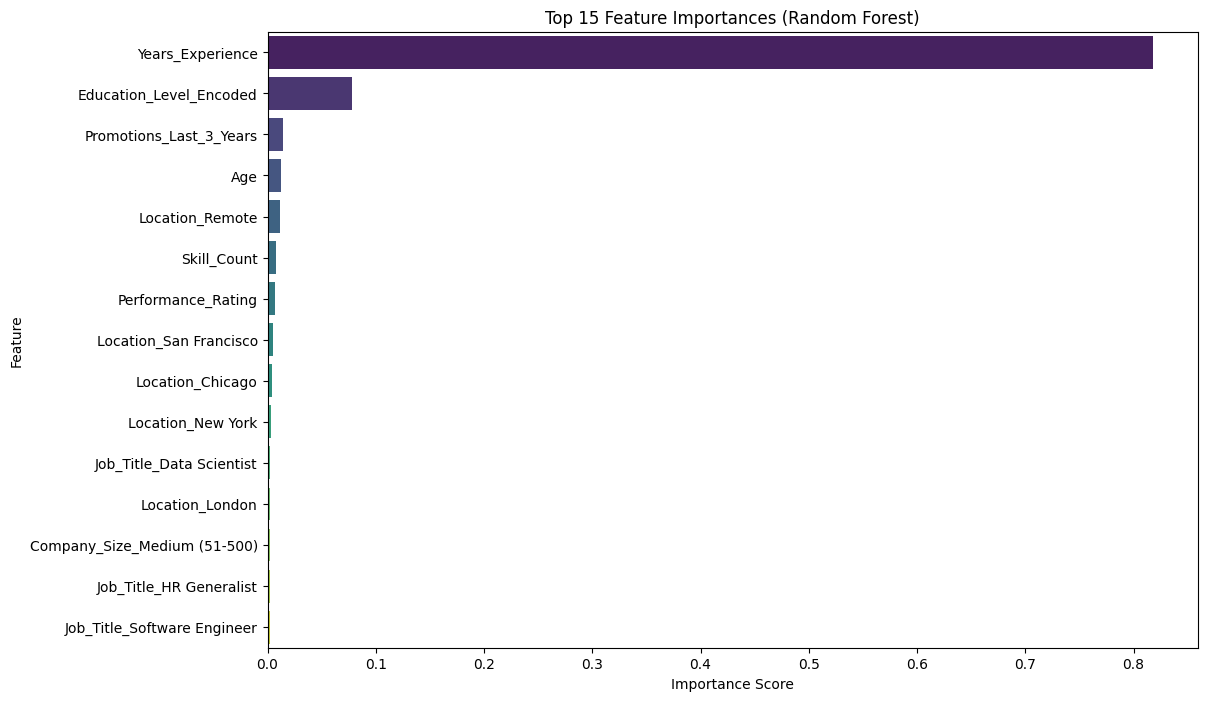


--- SHAP Values for Model Explainability ---

SHAP Global Feature Importance (Summary Plot):


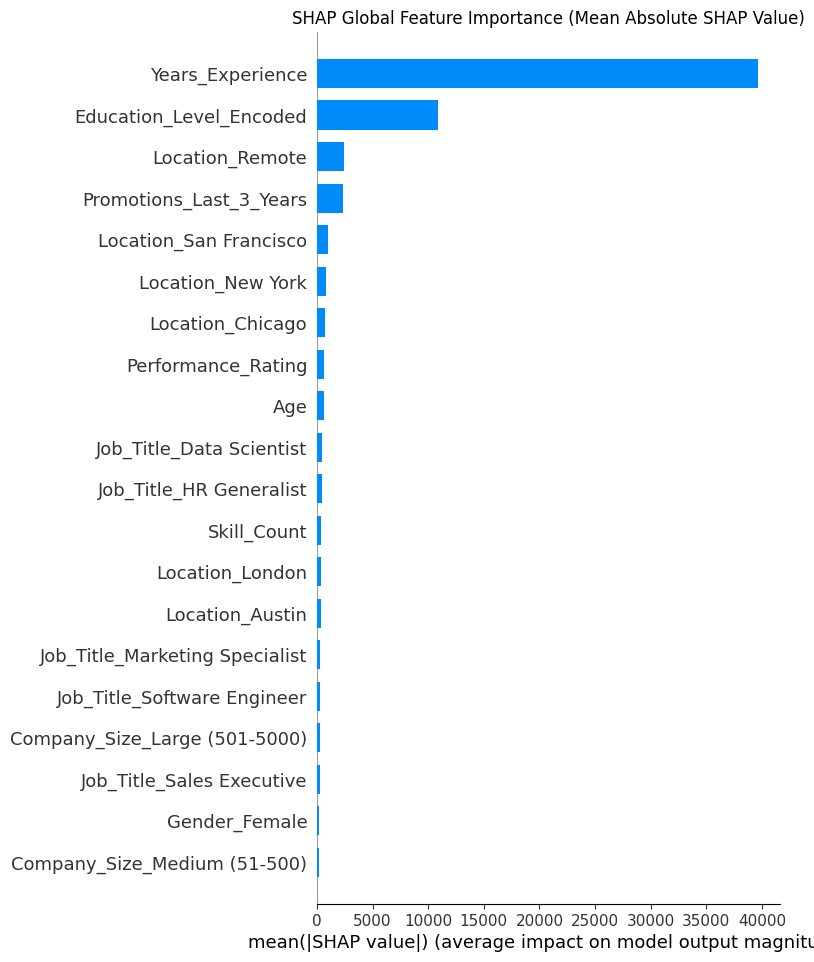

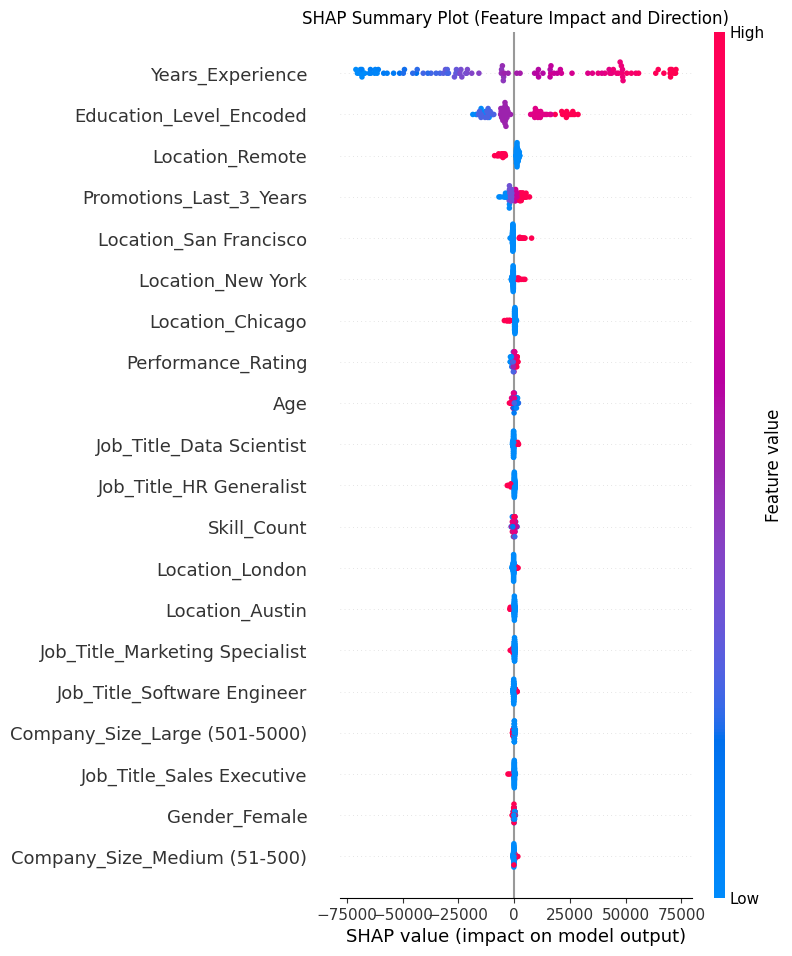


SHAP Explanation for an Individual Prediction (Force Plot):
Explaining prediction for instance 1 (Actual Salary: $217,507.21)
Predicted Salary: $196,367.55



--- Model Interpretation & Explainability Complete ---
You've explored feature importance and used SHAP values to understand your model.
This provides valuable insights into what drives salary predictions.


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter

# Import regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For model interpretability
import shap # Make sure to install: pip install shap

# --- START: Data Generation (Copied from Step 1 to make this step self-contained) ---
NUM_EMPLOYEES = 1000 # Number of synthetic employees to generate
SALARY_BASE = 50000 # Base salary for calculations
SALARY_RANGE = 150000 # Max deviation from base for salary
SKILL_COUNT_MAX = 10 # Max number of skills an employee can have

# Define possible categories for various features
EDUCATION_LEVELS = ['High School', 'Associate', 'Bachelor\'s', 'Master\'s', 'PhD']
JOB_TITLES = ['Software Engineer', 'Data Scientist', 'Product Manager', 'UX Designer', 'Marketing Specialist', 'HR Generalist', 'Sales Executive']
INDUSTRIES = ['Technology', 'Finance', 'Healthcare', 'Manufacturing', 'Retail', 'Education']
LOCATIONS = ['New York', 'San Francisco', 'Austin', 'Chicago', 'Remote', 'London', 'Berlin']
SKILLS_LIST = ['Python', 'SQL', 'AWS', 'Azure', 'GCP', 'Machine Learning', 'Deep Learning', 'Data Analysis', 'Project Management', 'Communication', 'Leadership', 'Salesforce', 'Tableau', 'PowerBI', 'Excel', 'JavaScript', 'React', 'Node.js', 'Java', 'C++', 'Marketing Strategy', 'HR Policies']
COMPANY_SIZES = ['Small (1-50)', 'Medium (51-500)', 'Large (501-5000)', 'Enterprise (>5000)']

# Generate Synthetic Data
data = {
    'Employee_ID': range(1, NUM_EMPLOYEES + 1),
    'Age': np.random.randint(22, 60, NUM_EMPLOYEES),
    'Gender': np.random.choice(['Male', 'Female', 'Non-binary'], NUM_EMPLOYEES, p=[0.48, 0.48, 0.04]),
    'Years_Experience': np.random.uniform(0, 30, NUM_EMPLOYEES).round(1),
    'Education_Level': np.random.choice(EDUCATION_LEVELS, NUM_EMPLOYEES, p=[0.1, 0.15, 0.4, 0.25, 0.1]),
    'Job_Title': np.random.choice(JOB_TITLES, NUM_EMPLOYEES),
    'Industry': np.random.choice(INDUSTRIES, NUM_EMPLOYEES),
    'Location': np.random.choice(LOCATIONS, NUM_EMPLOYEES, p=[0.15, 0.15, 0.1, 0.1, 0.2, 0.15, 0.15]),
    'Company_Size': np.random.choice(COMPANY_SIZES, NUM_EMPLOYEES, p=[0.2, 0.3, 0.3, 0.2]),
    'Performance_Rating': np.random.randint(1, 6, NUM_EMPLOYEES), # 1-5 scale
    'Promotions_Last_3_Years': np.random.randint(0, 4, NUM_EMPLOYEES),
}

df = pd.DataFrame(data)

# Add 'Skills' as a list of random skills for each employee
df['Skills'] = [random.sample(SKILLS_LIST, random.randint(1, SKILL_COUNT_MAX)) for _ in range(NUM_EMPLOYEES)]

# Calculate Salary based on a simplified formula (for demonstration)
def calculate_salary(row):
    salary = SALARY_BASE

    # Add based on Years of Experience
    salary += row['Years_Experience'] * (SALARY_RANGE / 30)

    # Add based on Education Level
    education_bonus = {
        'High School': 0, 'Associate': 5000, 'Bachelor\'s': 15000,
        'Master\'s': 30000, 'PhD': 50000
    }
    salary += education_bonus.get(row['Education_Level'], 0)

    # Add based on Job Title (simplified for demo)
    job_title_bonus = {
        'Software Engineer': 20000, 'Data Scientist': 25000, 'Product Manager': 18000,
        'UX Designer': 15000, 'Marketing Specialist': 10000, 'HR Generalist': 8000,
        'Sales Executive': 12000
    }
    salary += job_title_bonus.get(row['Job_Title'], 0)

    # Add based on Location (simplified for demo)
    location_bonus = {
        'New York': 30000, 'San Francisco': 35000, 'Austin': 15000,
        'Chicago': 10000, 'Remote': 5000, 'London': 25000, 'Berlin': 20000
    }
    salary += location_bonus.get(row['Location'], 0)

    # Add based on Performance Rating
    salary += row['Performance_Rating'] * 2000

    # Add based on Promotions
    salary += row['Promotions_Last_3_Years'] * 5000

    # Add a random noise to make it more realistic
    salary += np.random.normal(0, 10000)

    # Ensure salary is positive and within a reasonable range
    return max(10000, min(salary, SALARY_BASE + SALARY_RANGE + 100000))

df['Salary'] = df.apply(calculate_salary, axis=1).round(2)
# --- END: Data Generation ---

# --- START: Data Preprocessing & Feature Engineering (Copied from Step 3) ---
# 1. Feature Engineering: Create 'Skill_Count' from 'Skills' list
df['Skill_Count'] = df['Skills'].apply(len)

# 2. Define Features (X) and Target (y)
X = df.drop(['Employee_ID', 'Skills', 'Salary'], axis=1)
y = df['Salary']

# 3. Identify Numerical and Categorical Features for Preprocessing
numerical_features = ['Age', 'Years_Experience', 'Performance_Rating', 'Promotions_Last_3_Years', 'Skill_Count']
education_order = ['High School', 'Associate', 'Bachelor\'s', 'Master\'s', 'PhD']
nominal_features = ['Gender', 'Job_Title', 'Industry', 'Location', 'Company_Size']

# 4. Create Preprocessing Pipelines for different feature types
numerical_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder(categories=[education_order], handle_unknown='use_encoded_value', unknown_value=-1)
nominal_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ['Education_Level']),
        ('nom', nominal_transformer, nominal_features)
    ],
    remainder='passthrough'
)

# 5. Apply the Preprocessor to the Features
X_processed = preprocessor.fit_transform(X)

# 6. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
# --- END: Data Preprocessing & Feature Engineering ---

# --- START: Model Training (Copied from Step 4 - using the best model from tuning) ---
# For simplicity, we'll retrain the RandomForestRegressor with the best parameters found
# in the previous step, or a reasonable default if tuning was skipped.
# In a real scenario, you'd load your best_rf_model from a saved file.

# Define a reasonable set of parameters for the best model
best_rf_params = {
    'n_estimators': 100,
    'max_depth': 20,
    'min_samples_split': 2,
    'random_state': 42
}
best_rf_model = RandomForestRegressor(**best_rf_params)
best_rf_model.fit(X_train, y_train)
# --- END: Model Training ---


print("--- Starting Model Interpretation & Explainability ---")

# 1. Get Feature Names after Preprocessing
# This is crucial for interpreting feature importance and SHAP values correctly.
# numerical_features are straightforward.
# 'Education_Level' becomes 'Education_Level_Encoded'.
# One-hot encoded features need their names extracted from the OneHotEncoder.

# Get feature names from OneHotEncoder
ohe_feature_names = preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_features)

# Combine all feature names in the correct order
all_feature_names = numerical_features + ['Education_Level_Encoded'] + list(ohe_feature_names)

print(f"\nTotal number of features after preprocessing: {len(all_feature_names)}")
print(f"Example feature names (first 10): {all_feature_names[:10]}")


# 2. Feature Importance (for Tree-based Models like RandomForestRegressor)
print("\n--- Feature Importance from RandomForestRegressor ---")
if hasattr(best_rf_model, 'feature_importances_'):
    feature_importances = pd.Series(best_rf_model.feature_importances_, index=all_feature_names)
    sorted_importances = feature_importances.sort_values(ascending=False)

    print("Top 15 Most Important Features:")
    print(sorted_importances.head(15))

    # Visualize Feature Importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_importances.head(15).values, y=sorted_importances.head(15).index, palette='viridis')
    plt.title('Top 15 Feature Importances (Random Forest)')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()
else:
    print("Model does not have 'feature_importances_' attribute (e.g., Linear Regression).")


# 3. SHAP (SHapley Additive exPlanations) for Deeper Insight
# SHAP provides a way to explain individual predictions and global feature importance.
print("\n--- SHAP Values for Model Explainability ---")

# Create a SHAP Explainer object
# For tree-based models, shap.TreeExplainer is efficient.
# For other models, shap.KernelExplainer or shap.DeepExplainer might be used.
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for a sample of the test data (e.g., first 100 instances)
# Calculating for all test data can be computationally intensive for large datasets.
X_test_sample = X_test[:100]
shap_values = explainer.shap_values(X_test_sample)

# Convert X_test_sample to a DataFrame with feature names for better plotting
X_test_sample_df = pd.DataFrame(X_test_sample, columns=all_feature_names)

# Global Feature Importance (Summary Plot)
print("\nSHAP Global Feature Importance (Summary Plot):")
# This plot shows the overall impact of each feature on the model output.
# Red indicates high feature value, blue indicates low feature value.
shap.summary_plot(shap_values, X_test_sample_df, plot_type="bar", show=False)
plt.title('SHAP Global Feature Importance (Mean Absolute SHAP Value)')
plt.show()

shap.summary_plot(shap_values, X_test_sample_df, show=False)
plt.title('SHAP Summary Plot (Feature Impact and Direction)')
plt.show()


# Explain an Individual Prediction (Force Plot)
print("\nSHAP Explanation for an Individual Prediction (Force Plot):")
# Let's pick the first instance from the test sample
instance_index = 0
print(f"Explaining prediction for instance {instance_index + 1} (Actual Salary: ${y_test.iloc[instance_index]:,.2f})")
print(f"Predicted Salary: ${best_rf_model.predict(X_test[instance_index].reshape(1, -1))[0]:,.2f}")

# Force plot for a single prediction
# This plot shows how each feature contributes to pushing the output from the base value
# (average prediction) to the model's output for this specific instance.
# Positive SHAP values push the prediction higher (red), negative push it lower (blue).
shap.initjs() # Initialize JavaScript for interactive plots
shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test_sample_df.iloc[instance_index])
# Note: force_plot often renders best in Jupyter notebooks or environments with JS support.
# If it doesn't display interactively, you'll see a static representation or a message.


print("\n--- Model Interpretation & Explainability Complete ---")
print("You've explored feature importance and used SHAP values to understand your model.")
print("This provides valuable insights into what drives salary predictions.")

